In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/adult.csv")
dataset.shape

(32561, 15)

In [5]:
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# **Data Preprocessing**

In [6]:
dataset['income']=dataset['income'].map({'<=50K': 0, '>50K': 1})


In [7]:
dataset['occupation'].describe()

,occupation
count,32561
unique,15
top,Prof-specialty
freq,4140


In [8]:
dataset = dataset.replace('?',np.nan )

In [9]:
dataset['occupation'] = dataset['occupation'].fillna('Prof-specialty')

In [10]:
dataset['workclass'].describe()


,workclass
count,30725
unique,8
top,Private
freq,22696


In [11]:
dataset['workclass'] = dataset['workclass'].fillna('Private')

In [12]:
dataset['native.country'].describe()

,native.country
count,31978
unique,41
top,United-States
freq,29170


In [13]:
dataset['native.country'] = dataset['native.country'].fillna('United-States')

In [14]:

dataset.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


In [15]:
dataset.drop(['fnlwgt'], axis = 1, inplace = True)

In [16]:
Dataset = dataset.copy()

In [17]:
Dataset['age'] = pd.cut(Dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

In [18]:
Dataset['Hourse per Week'] = pd.cut(Dataset['hours.per.week'], bins = (0,30,40,100), labels=['Lesser Hours', 'Normal Hours', 'Extra Hours'])

<Axes: xlabel='income', ylabel='count'>

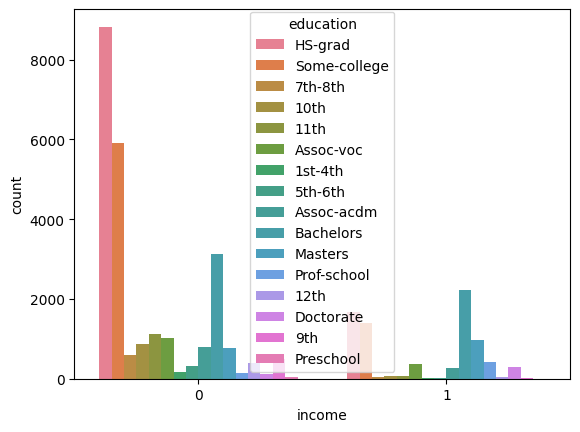

In [19]:
sns.countplot(x = 'income', hue = 'education', data = Dataset)

In [20]:
dataset.head()

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [21]:
X = dataset.drop(['income'], axis=1)
Y = dataset['income']

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [23]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

# **Applying Decision Tree Classification**

In [72]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier(criterion = "entropy", splitter="random", max_depth=10)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

84.6


In [78]:
decision_tree = DecisionTreeClassifier(criterion = "gini", splitter="best", max_depth=40)
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(acc_decision_tree)

98.03
